# Load Module

In [1]:
import numpy as np
import pandas as pd

# module for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# module for random forest
import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator

# module for AUC, ROC
from sklearn.metrics import auc, roc_curve, classification_report

# module for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# module for decision tree visualization
import graphviz
from sklearn import tree

%matplotlib inline

# Load Data

In [2]:
fd_data = pd.read_csv('/Users/xiaolingliu/Google_Drive/case_download/Collections_of_DS_FULL/Datasets/ML_Fradulent_activities/Fraud_Data.csv',
                        parse_dates = ['signup_time', 'purchase_time'])
fd_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [3]:
fd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
user_id           151112 non-null int64
signup_time       151112 non-null datetime64[ns]
purchase_time     151112 non-null datetime64[ns]
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB


In [4]:
fd_data['class'] = fd_data['class'].astype(str)

In [5]:
fd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
user_id           151112 non-null int64
signup_time       151112 non-null datetime64[ns]
purchase_time     151112 non-null datetime64[ns]
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null object
dtypes: datetime64[ns](2), float64(1), int64(3), object(5)
memory usage: 12.7+ MB


In [6]:
fd_data.describe(include = 'all')

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
count,151112.000000,151112,151112,151112.000000,151112,151112,151112,151112,151112.000000,1.511120e+05,151112
unique,NaN,151112,150679,NaN,137956,3,5,2,NaN,NaN,2
top,NaN,2015-06-30 03:58:38,2015-07-17 23:22:55,NaN,ZUSVMDEZRBDTX,SEO,Chrome,M,NaN,NaN,0
freq,NaN,1,3,NaN,20,60615,61432,88293,NaN,NaN,136961
first,NaN,2015-01-01 00:00:42,2015-01-01 00:00:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-08-18 04:40:29,2015-12-16 02:56:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,200171.040970,NaN,NaN,36.935372,NaN,NaN,NaN,NaN,33.140704,2.152145e+09,NaN
std,115369.285024,NaN,NaN,18.322762,NaN,NaN,NaN,NaN,8.617733,1.248497e+09,NaN
min,2.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,18.000000,5.209350e+04,NaN
25%,100642.500000,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,27.000000,1.085934e+09,NaN


In [7]:
ip_data = pd.read_csv('/Users/xiaolingliu/Google_Drive/case_download/Collections_of_DS_FULL/Datasets/ML_Fradulent_activities/IpAddress_to_Country.csv')
ip_data.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [8]:
ip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
lower_bound_ip_address    138846 non-null float64
upper_bound_ip_address    138846 non-null int64
country                   138846 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [9]:
ip_data.describe(include = 'all')

,lower_bound_ip_address,upper_bound_ip_address,country
count,1.388460e+05,1.388460e+05,138846
unique,NaN,NaN,235
top,NaN,NaN,United States
freq,NaN,NaN,46868
mean,2.724532e+09,2.724557e+09,NaN
std,8.975215e+08,8.974979e+08,NaN
min,1.677722e+07,1.677747e+07,NaN
25%,1.919930e+09,1.920008e+09,NaN
50%,3.230887e+09,3.230888e+09,NaN
75%,3.350465e+09,3.350466e+09,NaN


# Question 1 - Add country column to user information table

In [10]:
countries = []

for i in range(len(fd_data)):
    ip = fd_data.loc[i, 'ip_address']
    tmp = ip_data[(ip_data['lower_bound_ip_address'] <= ip) & 
                  (ip_data['upper_bound_ip_address'] >= ip)]
    
    if len(tmp) == 1:
        countries.append(tmp['country'].values[0])
    else:
        countries.append('NA')

fd_data['country'] = countries
fd_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [11]:
# check duplicates
len(fd_data) == len(fd_data['user_id'].unique())

True

In [12]:
fd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
user_id           151112 non-null int64
signup_time       151112 non-null datetime64[ns]
purchase_time     151112 non-null datetime64[ns]
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null object
country           151112 non-null object
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 13.8+ MB


In [13]:
fd_data.describe(include = 'all')

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
count,151112.000000,151112,151112,151112.000000,151112,151112,151112,151112,151112.000000,1.511120e+05,151112,151112
unique,NaN,151112,150679,NaN,137956,3,5,2,NaN,NaN,2,182
top,NaN,2015-06-30 03:58:38,2015-07-17 23:22:55,NaN,ZUSVMDEZRBDTX,SEO,Chrome,M,NaN,NaN,0,United States
freq,NaN,1,3,NaN,20,60615,61432,88293,NaN,NaN,136961,58049
first,NaN,2015-01-01 00:00:42,2015-01-01 00:00:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-08-18 04:40:29,2015-12-16 02:56:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,200171.040970,NaN,NaN,36.935372,NaN,NaN,NaN,NaN,33.140704,2.152145e+09,NaN,NaN
std,115369.285024,NaN,NaN,18.322762,NaN,NaN,NaN,NaN,8.617733,1.248497e+09,NaN,NaN
min,2.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,18.000000,5.209350e+04,NaN,NaN
25%,100642.500000,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,27.000000,1.085934e+09,NaN,NaN


# Feature Engineering

1. Time difference between sign-up time and purchase time.
2. If the device id is unique or certain users are sharing the same device (many different user ids using the same device could be an indicator of fake accounts).
3. Same for the ip address. Many different users having the same ip address could be an indicator of fake accounts.
4. Usual week of the year and day of the week from time variables.

In [14]:
# Get the time difference between purchase time and signup time
time_diff = (fd_data['purchase_time'] - fd_data['signup_time']).dt.seconds
fd_data['time_diff'] = time_diff

In [15]:
# Check user number for unique device
device_shared = fd_data[['user_id', 'device_id']].groupby('device_id').count().reset_index()
device_shared.rename(columns = {'user_id':'device_shared_num'}, inplace = True)
fd_data = fd_data.merge(device_shared, how = 'left', on = 'device_id')

In [16]:
# Check user number for ip address
ip_shared = fd_data[['user_id', 'ip_address']].groupby('ip_address').count().reset_index()
ip_shared.rename(columns = {'user_id':'ip_shared_num'}, inplace = True)
ip_shared.head()

fd_data = fd_data.merge(ip_shared, how = 'left', on = 'ip_address')

In [17]:
# Day of week, week of year
fd_data['signup_day'] = fd_data['signup_time'].dt.dayofweek
fd_data['signup_week'] = fd_data['signup_time'].dt.week

fd_data['purchase_day'] = fd_data['purchase_time'].dt.dayofweek
fd_data['purchase_week'] = fd_data['purchase_time'].dt.week

In [18]:
fd_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_diff,device_shared_num,ip_shared_num,signup_day,signup_week,purchase_day,purchase_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,13882,1,1,1,9,5,16
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944,1,1,6,23,0,24
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1,12,12,3,1,3,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA,60085,1,1,1,18,0,19
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,41461,1,1,1,30,2,37


In [19]:
# Extract features and target used in the model
columns = ['purchase_value', 'source', 'browser', 'sex', 'age', 'country', 
           'time_diff', 'signup_day', 'signup_week','purchase_day', 
           'purchase_week', 'device_shared_num', 'ip_shared_num', 'class']
data = fd_data[columns]
data.head()

,purchase_value,source,browser,sex,age,country,time_diff,signup_day,signup_week,purchase_day,purchase_week,device_shared_num,ip_shared_num,class
0,34,SEO,Chrome,M,39,Japan,13882,1,9,5,16,1,1,0
1,16,Ads,Chrome,F,53,United States,17944,6,23,0,24,1,1,0
2,15,SEO,Opera,M,53,United States,1,3,1,3,1,12,12,1
3,44,SEO,Safari,M,41,NA,60085,1,18,0,19,1,1,0
4,39,Ads,Safari,M,45,United States,41461,1,30,2,37,1,1,0


# Question 2 - Bulid model

I am going to pick a random forest to predict class (fraud/non-fraud). I pick a random forest cause: it usually requires very little time to optimize it (its default params are often close to the best ones) and it is strong with outliers, irrelevant variables, continuous and discrete variables. I will use the random forest to predict class, then I will use its partial dependence plots and variable importance to get insights about how it got information from the variables.

In [20]:
# Initialize H2O cluster
h2o.init()

# clean slate, in case cluster was already running
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "12.0.2" 2019-07-16; Java(TM) SE Runtime Environment (build 12.0.2+10); Java HotSpot(TM) 64-Bit Server VM (build 12.0.2+10, mixed mode, sharing)
  Starting server from /anaconda2/envs/py36/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/j5/plv79z5s051b_gn6vhwhdpw80000gn/T/tmprw6q5zxr
  JVM stdout: /var/folders/j5/plv79z5s051b_gn6vhwhdpw80000gn/T/tmprw6q5zxr/h2o_xiaolingliu_started_from_python.out
  JVM stderr: /var/folders/j5/plv79z5s051b_gn6vhwhdpw80000gn/T/tmprw6q5zxr/h2o_xiaolingliu_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.4
H2O cluster version age:,27 days
H2O cluster name:,H2O_from_python_xiaolingliu_lug66u
H2O cluster total nodes:,1
H2O cluster free memory:,4 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [21]:
# Transfer to H2O Frame
h2o_data = H2OFrame(data)
h2o_data.summary()

Parse progress: |█████████████████████████████████████████████████████████| 100%


,purchase_value,source,browser,sex,age,country,time_diff,signup_day,signup_week,purchase_day,purchase_week,device_shared_num,ip_shared_num,class
type,int,enum,enum,enum,int,enum,int,int,int,int,int,int,int,int
mins,9.0,,,,18.0,,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
mean,36.93537243898557,,,,33.14070358409671,,40942.58442744478,3.0272645455026814,16.501740430938494,3.0118190481232574,24.658571126052106,1.6843665625496353,1.602718513420512,0.09364577267192546
maxs,154.0,,,,76.0,,86399.0,6.0,34.0,6.0,51.0,20.0,20.0,1.0
sigma,18.32276214866217,,,,8.617733490961458,,26049.66190211831,2.0069722327628505,9.814287461798864,2.0062025228886737,11.651556782719489,2.616953602804178,2.596239527375844,0.2913362380721446
zeros,0,,,,0,,0,21871,0,21711,0,0,0,136961
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,34.0,SEO,Chrome,M,39.0,Japan,13882.0,1.0,9.0,5.0,16.0,1.0,1.0,0.0
1,16.0,Ads,Chrome,F,53.0,United States,17944.0,6.0,23.0,0.0,24.0,1.0,1.0,0.0
2,15.0,SEO,Opera,M,53.0,United States,1.0,3.0,1.0,3.0,1.0,12.0,12.0,1.0


In [22]:
# Make sure the target variable is categorical
h2o_data['signup_day'] = h2o_data['signup_day'].asfactor()
h2o_data['signup_week'] = h2o_data['signup_week'].asfactor()
h2o_data['purchase_day'] = h2o_data['purchase_day'].asfactor()
h2o_data['purchase_week'] = h2o_data['purchase_week'].asfactor()
h2o_data['class'] = h2o_data['class'].asfactor()

# Choose features and target variables
feature = h2o_data.col_names[:-1]
target = h2o_data.col_names[-1]

# Split into 70% training data and 30% test data
train, test = h2o_data.split_frame([0.7], seed = 1)

In [23]:
# Build random forest model
model = H2ORandomForestEstimator(balance_classes = True, ntrees = 100, mtries = -1, stopping_rounds = 5, 
                                 stopping_metric = 'auc', score_each_iteration = True, seed = 42)

model.train(x = feature, y = target, training_frame = train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [24]:
# Make prediction
train_true = train.as_data_frame()['class'].values
test_true = test.as_data_frame()['class'].values

train_pred = model.predict(train).as_data_frame()['p1'].values
test_pred = model.predict(test).as_data_frame()['p1'].values

drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


In [25]:
# Classification report
print('----classification report of train data----')
print(classification_report(y_true = train_true, y_pred = (train_pred > 0.5).astype(int)))
print('\t')
print('----classification report of test data----')
print(classification_report(y_true = test_true, y_pred = (test_pred > 0.5).astype(int)))

----classification report of train data----
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     95989
           1       1.00      0.80      0.89      9949

    accuracy                           0.98    105938
   macro avg       0.99      0.90      0.94    105938
weighted avg       0.98      0.98      0.98    105938

	
----classification report of test data----
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     40972
           1       1.00      0.53      0.69      4202

    accuracy                           0.96     45174
   macro avg       0.98      0.77      0.84     45174
weighted avg       0.96      0.96      0.95     45174



#### Train accuracy and test accuracy are pretty similar: 98% and 96%. We start from a 91% accuracy (that's the case if we classify everthing user as non-fraud.). So 96% is good but nothing shocking.

## Impact of FP v.s. FN

- If false positive cost much higher, we should increase the probability threshold, but pay the price TPR is also decreased.
- If false negative cost much higher, we should decrease the probability threshold, but pay the price FPR is also increased.


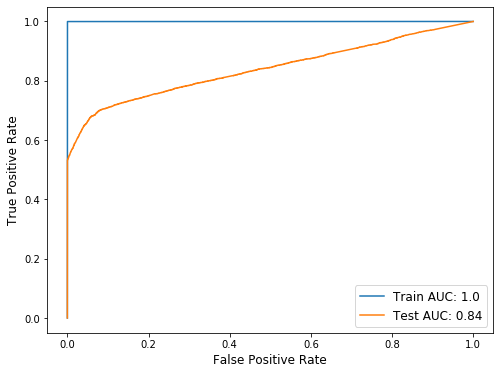

In [26]:
# Plot ROC, AUC
train_fpr, train_tpr, train_thresholds = roc_curve(train_true, train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(test_true, test_pred)

train_auc = np.round(auc(train_fpr, train_tpr), 3)
test_auc = np.round(auc(test_fpr, test_tpr), 3)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_fpr, train_tpr, label='Train AUC: ' + str(train_auc))
ax.plot(test_fpr, test_tpr, label='Test AUC: ' + str(test_auc))
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.legend(fontsize=12)

In this case, because normally this "Fraud Detection Model" is often used in a pre-screening step, whose result will be further investigated by expert, so 
- if 'Not Fraud' is classified as 'Fraud', human expert can still have method to fix the problem 
- but if 'Fraud' is classified as 'Not Fraud', the company will lose money directly.

so in this case, "false negative" cost much higher, so we should choose a relatively smaller threshold.

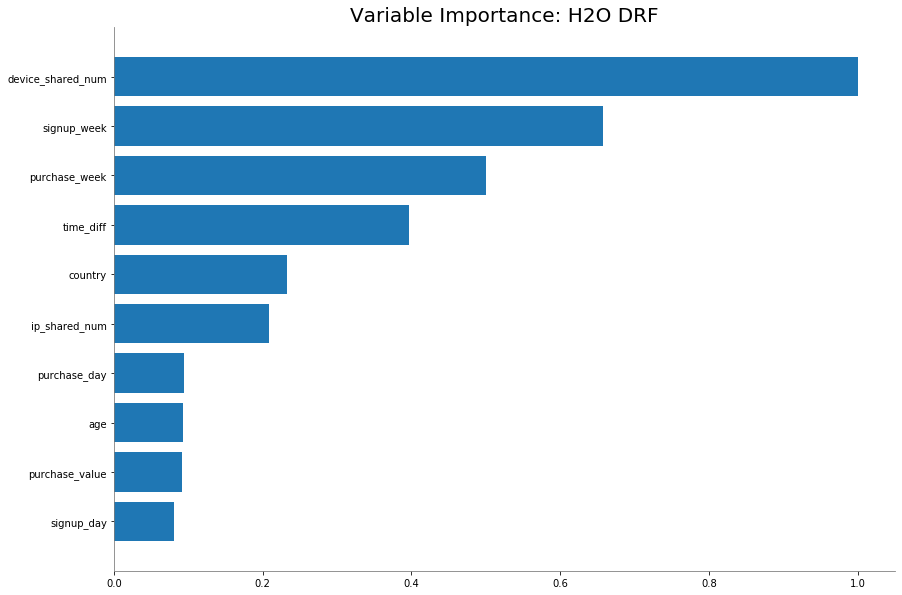

In [30]:
model.varimp_plot()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


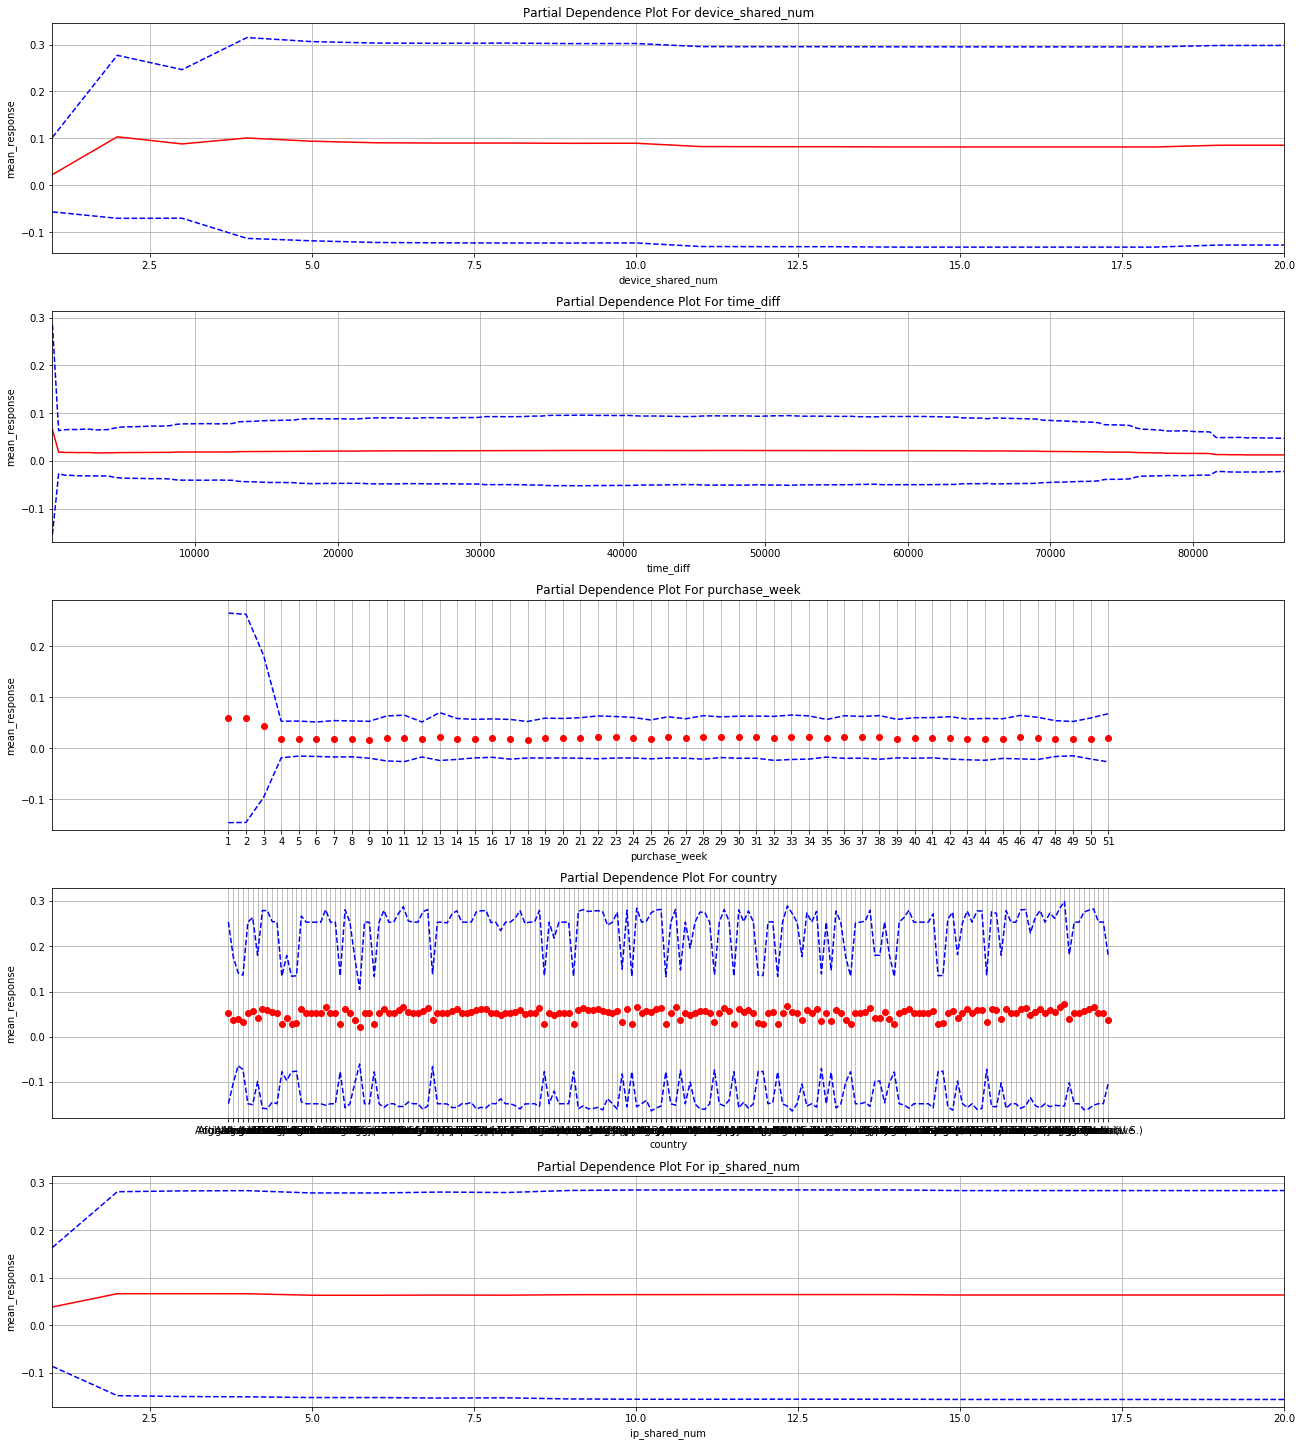

In [31]:
# Plot partial dependence plots
cols = ['device_shared_num', 'time_diff', 'purchase_week', 'country', 'ip_shared_num']
_ = model.partial_plot(data=train, cols=cols, nbins=200, figsize=(18, 20))

# Question 3 - Fraud characteristics

To better understand, we fit a shallow, simple Decision Tree and plot it.

In [32]:
# sklearn needs transfering categorical value using one-hot encoding, not good using labelcode here
dummies = pd.get_dummies(data[['signup_week', 'purchase_week', 'country']])
X = pd.concat(objs=[data[['device_shared_num', 'time_diff']], dummies], axis=1)
y = data['class']

In [33]:
# split data, 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 1)

In [34]:
# build decision tree model
clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [35]:
# evaluate data
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9558388847222835


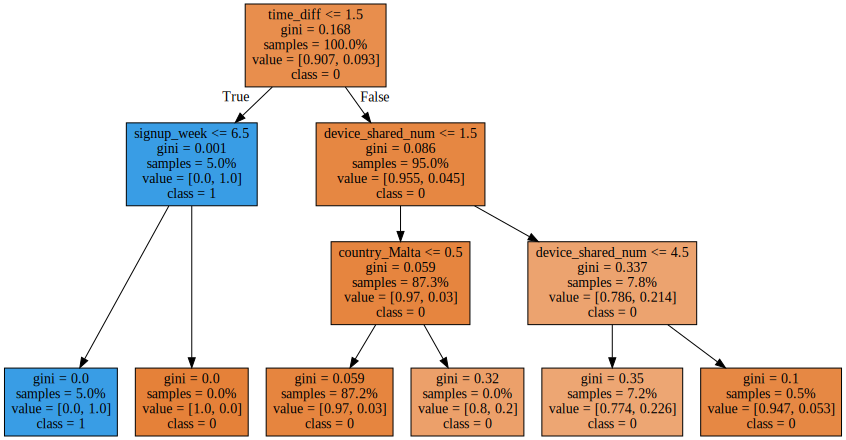

In [36]:
# decision visualization
features = list(X_train.columns)
targets = ['0', '1']
dot_data = tree.export_graphviz(clf, feature_names = features, class_names = targets, 
                                filled = True, proportion = True, leaves_parallel = True)
graph = graphviz.Source(dot_data)
graph

from above plot, we focus on two leaf-nodes

- the blue leaf node indicates, if 'time_diff' is <= 1.5 seconds, which means the customer purchases immediatelly after signup, then there is very high probability that this transaction is fraud.
- the leaf-node with positive ratio = 23% (the second node from right), if the purchase is from a device shared by 2~4 users, then there is above-normal probability that the transaction is fraud.

# Question 4

Let's say you now have this model which can be used live to predict in real time if an activity is fraudulent or not. From a product perspective, how would you use it? That is, what kind of diﬀerent user experiences would you build based on the model output?

since my model can predict the probability a purchase is fraud, so I need to set two probability cutoffs as 'alert value', alert1 and alert2, and alert1 < alert2 .

for a incoming purchase, my model will return the probability 'p' that the purchase is fraud,

1. if p < alert1, then I assume the purchase is normal, proceed without any problem
2. if alert1 <= p < alert2, then I assume the purchase is suspicious, I will ask the customer for additional authroization. for example, send email or SMS to the customer, let him/her authorize the purchase.
3. if p>= alert2, then the purchase is highly suspicious, I not only ask the customer for additional authorization via email or SMS, but also put the purchase on hold and send the purchase information to some human expert for further investigation.